In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
# Loading and preparing a dataset

In [2]:
# Load the dataset
data = pd.read_csv('data.csv')

In [3]:
# Select relevant features and target variable
# Assuming 'diagnosis' is the target variable and is binary (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [4]:
# Choose features for classification (e.g., radius_mean and texture_mean)
X = data[['radius_mean', 'texture_mean']].values
y = data['diagnosis'].values

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training SVM Model

In [6]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC()

In [ ]:
# Visualizing decision boundary

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_decision_boundary(svm, X, y, title):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the mesh grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Radius Mean')
    plt.ylabel('Texture Mean')
    plt.show()

In [10]:
# Plotting decision boundaries

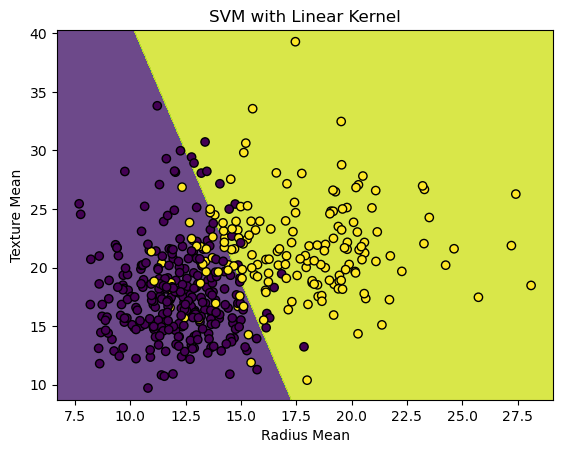

In [11]:
# Using a Linear Kerneal
plot_decision_boundary(svm_linear, X_train, y_train, 'SVM with Linear Kernel')

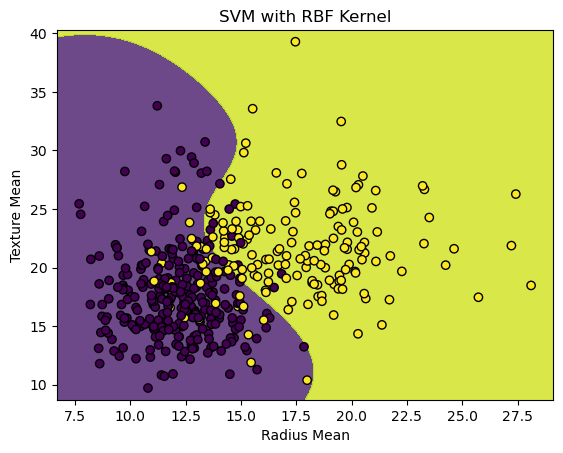

In [12]:
# Using a Radial Basis Function (RBF) Kerneal
plot_decision_boundary(svm_rbf, X_train, y_train, 'SVM with RBF Kernel')

In [ ]:
# Tuning Hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

In [15]:
# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1]})

In [16]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'C': 1, 'gamma': 0.01}


In [ ]:
# Evaluvation

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Evaluate the best model using cross-validation
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.85964912 0.87719298 0.9122807  0.92982456 0.91150442]
Mean cross-validation score:  0.8980903586399627
